In [112]:
from pathlib import Path
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100

In [113]:
fatture_ext = pd.read_excel("excels/eventi_manutenzioni_esterne (da fatture).xlsx", sheet_name=0)
veicoli = pd.read_excel("excels/SEA_Flotta_Elenco_Veicoli.xlsx", index_col='N')

odometer_dict = {
    "MOVIMATICA": ["MOVIMATICA/vehicles", "odometer", "plate"],
    "SCANIAFLEET": ["SCANIA/RfmsStatusCurrent", "HRTotalVehicleDistance", "foo"],
    "VISIRUN": ["VISIRUN/CurrentPosition", "odometer", "vehiclePlate"]
}

targhe = [
"FY293YC", "FY295YC", "FY298YC", "FY294YC", "FY296YC", "FV903SK", "FV904SK", "FV906SK", "FV907SK", "FV908SK", "FZ330SC", "FV913SK", "FV914SK", "FY402YC", "FY403YC", "ZB477AN", "ZB473AN", "ZB474AN", "ZB476AN", "ZB475AN", "ZB478AN", "ZB137AR", "ZB139AR", "ZB150AR", "ZB127AR", "ZB132AR", "ZB128AR", "ZB131AR", "ZB130AR", "FY400YC", "ZB135AR", "ZB136AR", "ZB134AR", "ZB373AN", "FY401YC", "CW363HC", "CW367HC", "FP698BP", "FP699BP", "CW365HC", "CW368HC", "CN433CA", "FV989FV", "FV990FV", "FV991FV", "FV995FV", "FV996FV", "FV997FV", "FV992FV", "FV985FV", "FV987FV", "FV988FV", "FV993FV", "FV994FV", "EG181YE", "FV986FV", "EN971TN", "FY299YC", 
]

veicoli = veicoli.drop(veicoli.columns[-5:-2], axis=1)[veicoli.TARGA.isin(targhe)]\
          .reset_index(drop=True).rename(columns=str.title).rename(columns=str.strip)
veicoli["plate"] = veicoli.Targa

# mov_visir = veicoli[(veicoli["SISTEMA GPS TRACKING"].str.contains("VISIRUN"))&(veicoli["SISTEMA GPS TRACKING"].str.contains("MOVIMATICA"))].TARGA

veicoli["Sistema Gps Tracking"] = veicoli["Sistema Gps Tracking"].str.replace(' ', '').str.split('+')#.unique()
veicoli = veicoli.explode("Sistema Gps Tracking").groupby(['Targa', 'Sistema Gps Tracking']).first()


print(f"Numero targhe complessivo: {len(targhe)}")

fatture_ext.head()

Numero targhe complessivo: 58


,Targa,Telaio,Tipo_veicolo,Km,Apertura_commessa,Anno,Importo,Tipo_manutenzione,Manutenzione_struttura,Descrizione,Commenti
0,FV903SK,YS2P4X20009249086,Compattatore,26040.0,2020-01-24,2020,561.31,Ordinaria,Telaio,NaN,NaN
1,FV903SK,YS2P4X20009249086,Compattatore,31644.0,2020-03-31,2020,227.75,Ordinaria,Telaio,NaN,NaN
2,FV903SK,YS2P4X20009249086,Compattatore,NaN,2020-09-15,2020,445.61,Ordinaria,Telaio,NaN,NaN
3,FV903SK,YS2P4X20009249086,Compattatore,26040.0,2021-02-10,2021,561.31,Ordinaria,Telaio,NaN,NaN
4,FV903SK,YS2P4V20009249086,Compattatore,NaN,2021-03-31,2021,207.40,Ordinaria,Telaio,NaN,(è cambiato id telaio sul file Elenco_Veicoli ...


## ODOMETER
### Movimatica

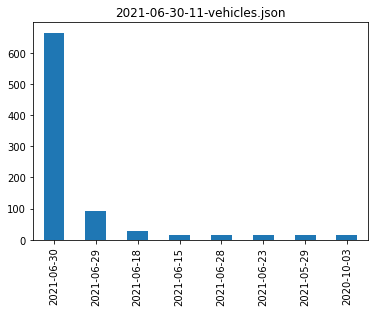

In [118]:
date = "2021-06-30"
mov_df = pd.DataFrame([])
for f in  Path(f"SEA Data Lake/{odometer_dict['MOVIMATICA'][0]}").glob(f"{date}*"):
    mov_df = mov_df.append(pd.read_json(f))

mov_df.position_timestamp = pd.to_datetime(mov_df.position_timestamp)

mov_df.position_timestamp.dt.date.value_counts().plot(kind='bar')
mov_df = mov_df[mov_df.position_timestamp>"2021-06-30"].reset_index()

plt.xticks(rotation=90)
plt.title(f.name)
plt.show()

In [119]:
pd.set_option('display.max_rows', 100)

mov_df["hour_timestamp"] = mov_df.position_timestamp.dt.strftime('%H:%M')
mov_df.sort_values(by=["plate", "position_timestamp"]).groupby(["plate", "hour_timestamp"]).odometer.first().to_frame()

odometer
plate   hour_timestamp          
D6479   06:43                 11
        08:13                 11
        08:56                 11
        10:12                 11
        10:45                 11
...                          ...
ZB477AN 16:26              26794
        17:38              26794
ZB478AN 06:04              33921
        07:10              33931
        09:45              33949

[164 rows x 1 columns]

In [134]:
mov_df

,index,alarm_id,alarm_name,alarm_priority,alarm_tipology_id,alarm_tipology_label,box,brand,chassis,customId,engineHours,fleet_id,fleet_ilabel,hasTelemetry,id,lock_enabled,lock_locked,lock_status,model,name,odometer,plate,position_gps_lat,position_gps_lng,position_id,position_ignition,position_place_address,position_place_country_id,position_place_country_label,position_place_placeStr,position_place_state,position_place_zip,position_speed,position_timestamp,position_typology_id,position_typology_label,sav,typology_id,typology_label,hour_timestamp
0,0,0,,0,NONE,,D4257,Isuzu,TIS213369/18,,4732,0,,False,7425,True,False,disabled,M21,Isuzu M21,33949,ZB478AN,45.960667,8.420280,1133843349,False,Via Pra' del Fico,IT,Italia,Ornavasso,Piemonte,28877,0,2021-06-30 09:45:27+00:00,motion_stop,Fine movimento,TIS213369/18,COMPACTOR,Compattatore,09:45
1,1,0,,0,NONE,,D4324,Isuzu,TIS283444/18,,4647,0,,False,7428,True,False,disabled,M21,Isuzu M21,40598,ZB476AN,45.960278,8.420494,1134005455,False,Via Alfredo di Dio,IT,Italia,Ornavasso,Piemonte,28877,0,2021-06-30 10:20:20+00:00,motion_stop,Fine movimento,TIS283444/18,COMPACTOR,Compattatore,10:20
2,2,0,,0,NONE,,D4314,Isuzu,TIS213368/18,,3675,0,,False,7430,True,False,disabled,M21,Isuzu M21,26794,ZB477AN,41.783756,12.301887,1134836265,False,Via del Macchione Rotondo,IT,Italia,Roma,Lazio,119,0,2021-06-30 16:26:25+00:00,digital_input_change,Cambio Digital IN,TIS213368/18,COMPACTOR,Compattatore,16:26
3,3,0,,0,NONE,,D6190,Isuzu,TIS433613/18,,1620,0,,False,9606,True,False,disabled,P75,Isuzu P75,66564,ZB127AR,44.585140,7.904008,1133993496,False,Località Fasana 8,IT,Italia,Fasana,Piemonte,12060,0,2021-06-30 10:13:12+00:00,motion_stop,Fine movimento,TIS433613/18,COMPACTOR,Compattatore,10:13
4,4,0,,0,NONE,,D7349,Isuzu,TIS114471/20,,6,0,,True,11531,True,False,disabled,L35,Isuzu L35,8,D7349,38.142883,15.516418,1133061138,False,Autostrada Messina-Palermo,IT,Italia,Messina,Sicilia,98129,0,2021-06-30 00:33:34+00:00,low_power,Basso consumo,TIS114471/20,COMPACTOR,Compattatore,00:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,55,0,,0,NONE,,D4258,Isuzu,TIS283440/18,,4626,0,,False,7413,True,False,disabled,M21,Isuzu M21,43119,ZB474AN,45.929455,8.440192,1134115153,False,Via Mario Cavagnino,IT,Italia,Gravellona Toce,Piemonte,28883,0,2021-06-30 11:13:10+00:00,motion_stop,Fine movimento,TIS283440/18,COMPACTOR,Compattatore,11:13
660,56,0,,0,NONE,,D4345,Volvo,TIMP23759/20,,516,0,,False,9847,True,False,disabled,FL 280,Volvo FL 280,12606,EA203TN,43.906490,11.019726,1134000239,False,Via Taliercio,IT,Italia,Montale,Toscana,51037,0,2021-06-30 10:18:07+00:00,digital_input_change,Cambio Digital IN,TIMP23759/20,COMPACTOR,Compattatore,10:18
661,57,0,,0,NONE,,D6250,Isuzu,TIS433614/18,,1684,0,,False,9720,True,False,disabled,P75,Isuzu P75,61275,ZB131AR,44.651028,7.776335,1133516547,True,Frazione Cappellazzo,IT,Italia,Cherasco,Piemonte,12062,0,2021-06-30 07:53:53+00:00,digital_input_change,Cambio Digital IN,TIS433614/18,COMPACTOR,Compattatore,07:53
662,59,0,,0,NONE,,D6226,Scania,TIMP44644/18,,2143,0,,False,9465,True,False,disabled,P280,Scania P280,61207,FV908SK,43.872520,11.106995,1133971374,False,Via Tommaso Di Piero 9,IT,Italia,Prato,Toscana,59100,1,2021-06-30 10:08:14+00:00,motion_stop,Fine movimento,TIMP44644/18,COMPACTOR,Compattatore,10:08


In [145]:
mov_df.groupby('plate').position_timestamp.transform('min')

0     2021-06-30 06:04:50+00:00
1     2021-06-30 05:39:16+00:00
2     2021-06-30 10:05:51+00:00
3     2021-06-30 04:46:45+00:00
4     2021-06-30 00:33:34+00:00
                 ...           
659   2021-06-30 03:17:31+00:00
660   2021-06-30 03:47:32+00:00
661   2021-06-30 03:48:19+00:00
662   2021-06-30 06:00:14+00:00
663   2021-06-30 03:19:51+00:00
Name: position_timestamp, Length: 664, dtype: datetime64[ns, UTC]

In [147]:
mov_df.delta_time

0     0 days 03:40:37
1     0 days 04:41:04
2     0 days 06:20:34
3     0 days 05:26:27
4     0 days 00:00:00
            ...      
659   0 days 07:55:39
660   0 days 06:30:35
661   0 days 04:05:34
662   0 days 04:08:00
663   0 days 06:04:33
Name: delta_time, Length: 664, dtype: timedelta64[ns]

In [ ]:
mov_

In [157]:
mov_df['delta_time'].dt.fo.astype(str)

0      0 days 03:40:37
1      0 days 04:41:04
2      0 days 06:20:34
3      0 days 05:26:27
4      0 days 00:00:00
            ...       
659    0 days 07:55:39
660    0 days 06:30:35
661    0 days 04:05:34
662    0 days 04:08:00
663    0 days 06:04:33
Name: delta_time, Length: 664, dtype: object

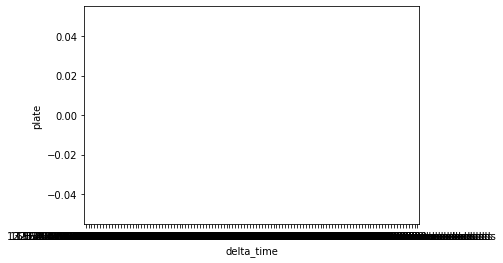

In [156]:
mov_df['delta_time'] = mov_df.position_timestamp - mov_df.groupby('plate').position_timestamp.transform('min')
# fig, ax = plt.subplots(figsize=(12,12))
# g = sns.scatterplot(data=mov_df, y='plate', x=mov_df.position_timestamp.dt.hour, ax=ax, hue='plate')
g = sns.stripplot(data=mov_df[['plate', 'delta_time']], x="delta_time", y="plate")#, ax=ax)
# g.get_legend().remove()
# g.tick_params(axis='x', rotation=90)

# for ind, label in enumerate(g.get_xticklabels()):
#     if ind % 10 == 0:  # every 10th label is kept
#         label.set_visible(True)
#     else:
#         label.set_visible(False)

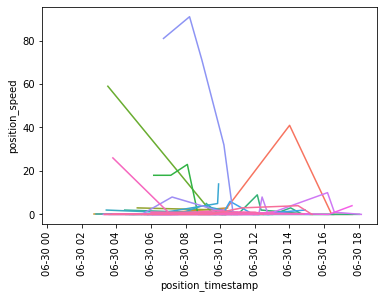

In [123]:
g = sns.lineplot(data=mov_df, x="position_timestamp", y="position_speed", hue='plate')
g.tick_params(axis='x', rotation=90)
g.get_legend().remove()

/home/students/s265780/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:1740: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


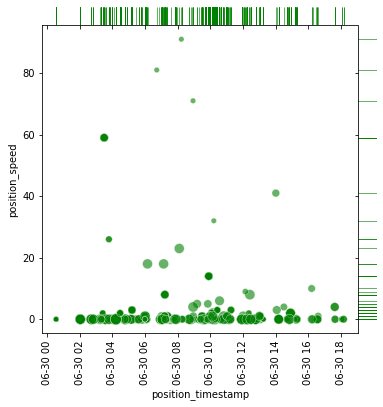

In [135]:
g = sns.JointGrid(data=mov_df, x="position_timestamp", y="position_speed", space=0, ratio=17)
g.plot_joint(sns.scatterplot, size=mov_df.odometer, sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

g.fig.get_axes()[0].tick_params(axis='x', rotation=90)

---
## SCANIA

In [85]:
# tracking["plate"] = 
sc_df = sc_df.join(veicoli.reset_index()[['Telaio', 'Targa']].set_index("Telaio"), on="VIN")
# VIN.apply(lambda vin: next(iter(veicoli[veicoli.TELAIO == vin].droplevel(1).index), None))

,VIN,TriggerType,CreatedDateTime,ReceivedDateTime,Latitude,Longitude,Heading,Altitude,Speed,PositionDateTime,WheelBasedSpeed,HRTotalVehicleDistance,EngineTotalFuelUsed,FuelLevel1,CatalystFuelLevel,DriverIdentification,DriverOemIdentification,DriverWorkingState,hour_timestamp,Targa
0,YS2P6X20009251379,TIMER,2021-06-29T15:34:26,2021-06-29T15:54:37,43.906586,11.020473,153,47,0,2021-06-29T15:04:26,,1970-01-01 00:00:00.000055117,29345,54,59,Unknown,Unknown,,00:00,FV913SK
0,YS2P6X20009251379,TIMER,2021-06-29T15:34:26,2021-06-29T15:54:37,43.906586,11.020473,153,47,0,2021-06-29T15:04:26,,1970-01-01 00:00:00.000055117,29345,54,59,Unknown,Unknown,,00:00,FV913SK
1,YS2P4X20009249011,TIMER,2021-06-29T11:06:36,2021-06-29T11:06:42,45.947304,10.905190,109,90,0,2021-06-29T11:06:36,,1970-01-01 00:00:00.000040470,21417,66,98,Unknown,Unknown,,00:00,FV904SK
1,YS2P4X20009249011,TIMER,2021-06-29T11:06:36,2021-06-29T11:06:42,45.947304,10.905190,109,90,0,2021-06-29T11:06:36,,1970-01-01 00:00:00.000040470,21417,66,98,Unknown,Unknown,,00:00,FV904SK
1,YS2P4X20009249011,TIMER,2021-06-29T11:06:36,2021-06-29T11:06:42,45.947304,10.905190,109,90,0,2021-06-29T11:06:36,,1970-01-01 00:00:00.000040470,21417,66,98,Unknown,Unknown,,00:00,FV904SK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,YS2P6X20009251407,TIMER,2021-06-30T11:17:43,2021-06-30T11:17:50,45.947308,10.905293,200,82,0,2021-06-30T11:17:45,,1970-01-01 00:00:00.000038984,24368,60,95,Unknown,Unknown,,00:00,FV914SK
10,YS2P4X20009248875,TIMER,2021-06-29T11:01:35,2021-06-29T11:01:50,45.947450,10.905308,110,120,0,2021-06-29T11:01:44,,1970-01-01 00:00:00.000050417,19254,83,72,Unknown,Unknown,,00:00,FV906SK
10,YS2P4X20009248875,TIMER,2021-06-29T11:01:35,2021-06-29T11:01:50,45.947450,10.905308,110,120,0,2021-06-29T11:01:44,,1970-01-01 00:00:00.000050417,19254,83,72,Unknown,Unknown,,00:00,FV906SK
10,YS2P4X20009248875,TIMER,2021-06-29T11:01:35,2021-06-29T11:01:50,45.947450,10.905308,110,120,0,2021-06-29T11:01:44,,1970-01-01 00:00:00.000050417,19254,83,72,Unknown,Unknown,,00:00,FV906SK


In [136]:
date = "2021-06-30"
sc_df = pd.DataFrame([])
for f in  Path(f"SEA Data Lake/{odometer_dict['SCANIAFLEET'][0]}").glob(f"{date}*"):
    sc_df = sc_df.append(pd.read_json(f))

sc_df = sc_df.join(veicoli.set_index('Telaio').plate, on="VIN")
sc_df[odometer_dict['SCANIAFLEET'][1]] = pd.to_datetime(sc_df[odometer_dict['SCANIAFLEET'][1]])

sc_df["hour_timestamp"] = sc_df[odometer_dict['SCANIAFLEET'][1]].dt.strftime('%H:%M')
sc_df.sort_values(by=["plate", "hour_timestamp"]).groupby(["plate", "hour_timestamp"])[odometer_dict['SCANIAFLEET'][1]].first().to_frame()

,,HRTotalVehicleDistance
plate,hour_timestamp,
FV903SK,00:00,1970-01-01 00:00:00.000066754
FV904SK,00:00,1970-01-01 00:00:00.000040470
FV906SK,00:00,1970-01-01 00:00:00.000050417
FV907SK,00:00,1970-01-01 00:00:00.000062833
FV908SK,00:00,1970-01-01 00:00:00.000062278
FV913SK,00:00,1970-01-01 00:00:00.000055117
FV914SK,00:00,1970-01-01 00:00:00.000038931
FZ330SC,00:00,1970-01-01 00:00:00.000055023


In [92]:
odometer_dict

{'MOVIMATICA': ['MOVIMATICA/vehicles', 'odometer', 'plate'],
 'SCANIAFLEET': ['SCANIA/RfmsStatusCurrent', 'HRTotalVehicleDistance', 'foo'],
 'VISIRUN': ['VISIRUN/CurrentPosition', 'odometer', 'vehiclePlate']}

---

In [4]:
aggregated = pd.DataFrame([]) 
gpb = fatture_ext.groupby(["Targa", "Anno"])
aggregated["Type"] = gpb.Tipo_veicolo.first()
aggregated["Sum_cost"] = gpb.Importo.sum()
aggregated["Count_events"] = gpb.Importo.count()
aggregated["Avg_cost"] = (aggregated.Sum_cost / aggregated.Count_events).round(2)
aggregated["Date_min"] = gpb.Apertura_commessa.min()
aggregated["Date_max"] = gpb.Apertura_commessa.max()
aggregated["Period"] = aggregated["Date_max"] - aggregated["Date_min"]
aggregated["avg_Cost/anno"] = aggregated.Sum_cost / aggregated["Period"].dt.days*365
aggregated["avg_events/anno"] = aggregated.Count_events / aggregated["Period"].dt.days*365
aggregated["km_min"] = gpb.Km.min()
aggregated["km_max"] = gpb.Km.max()
aggregated["Delta_km"] = aggregated.km_max - aggregated.km_min
aggregated["avg_Cost/10.000km"] = aggregated.Sum_cost / aggregated.Delta_km*10000
aggregated["avg_events/10.000km"] = aggregated.Count_events / aggregated.Delta_km*10000
aggregated["avg_Period/10.000km"] = aggregated.Period.dt.days / aggregated.Delta_km*10000

aggregated = aggregated.reset_index()
# with pd.ExcelWriter('excels/eventi_manutenzioni_esterne (da fatture).xlsx') as writer:  
#     fatture_ext.to_excel(writer, sheet_name='elenco fatture', index=False)
#     aggregated.to_excel(writer, sheet_name='analisi aggregata', startcol=False)

---
**Selecting only data from May 2021 to 22th Sep 2021**

In [5]:
fatture_ext = fatture_ext[(fatture_ext.Apertura_commessa > "2021-05-1")&(fatture_ext.Apertura_commessa < "2021-09-22")]

---

In [173]:
discrepancies = pd.DataFrame([])
for i, row in tqdm(fatture_ext.iterrows(), total=len(fatture_ext)):
    date = row.Apertura_commessa.date()    
    curr_dict = {
        "plate": row.Targa,
        "date": date,
        "fattura": row.Km,
    }
    for fornitore in ["MOVIMATICA", "VISIRUN", "SCANIAFLEET"]:
#     for fornitore in ["SCANIAFLEET"]:
        if fornitore  not in veicoli.xs(row.Targa, level=0).index.to_list():
            continue

        track_date = Path(f"SEA Data Lake/{odometer_dict[fornitore][0]}").glob(f"{date}*")
        if fornitore == "VISIRUN": track_date = Path(f"SEA Data Lake/{odometer_dict[fornitore][0]}").glob(f"{date}*{row.Targa}*")
        if not any(track_date): continue #Todo: maggiore controllo
            
        tracking = pd.DataFrame([])
        for file in track_date:
            tracking = tracking.append(pd.read_json(file, typ='series' if fornitore=='VISIRUN' else 'frame'), ignore_index=True)
        tracking = tracking.rename({
            odometer_dict[fornitore][1]: 'odometer',
            odometer_dict[fornitore][2]: 'plate',
        }, axis=1)
        
        if "plate" not in tracking.columns:
            tracking["plate"] = tracking.VIN.apply(lambda vin: next(iter(veicoli[veicoli.TELAIO == vin].droplevel(1).index), None))
        if fornitore == 'SCANIA': break
        curr_dict[fornitore.lower()] = tracking[tracking.plate==row.Targa].odometer.min()
#         km_max = tracking[tracking.plate==row.Targa].odometer.max()

    discrepancies = discrepancies.append(curr_dict, ignore_index=True)

100%|██████████| 85/85 [01:34<00:00,  1.11s/it]


In [322]:
discrepancies

,plate,date,fattura,movimatica,visirun,scaniafleet
0,ZB134AR,2021-05-04,49393.0,NaN,NaN,NaN
1,FV994FV,2021-05-04,59408.0,NaN,NaN,NaN
2,FV908SK,2021-05-12,NaN,59360.0,NaN,NaN
3,FZ330SC,2021-05-13,51027.0,50931.0,NaN,NaN
4,ZB131AR,2021-05-15,NaN,58193.0,NaN,NaN
...,...,...,...,...,...,...
80,FV997FV,2021-09-11,47610.0,NaN,NaN,NaN
81,ZB477AN,2021-09-14,96925.0,28207.0,95127345.0,NaN
82,ZB131AR,2021-09-15,NaN,66584.0,NaN,NaN
83,FV989FV,2021-09-17,50970.0,NaN,NaN,NaN


In [321]:
discrepancies[~((discrepancies.movimatica.isna())&(discrepancies.visirun.isna())&(discrepancies.scaniafleet.isna()))&discrepancies.fattura.notna()].plate.unique()

array(['FZ330SC', 'ZB134AR', 'ZB478AN', 'ZB476AN', 'FV907SK', 'FY296YC',
       'ZB135AR', 'ZB139AR', 'FV913SK', 'FY293YC', 'FV908SK', 'FV903SK',
       'ZB127AR', 'ZB137AR', 'ZB150AR', 'CW365HC', 'ZB477AN'],
      dtype=object)

In [181]:
onlydiff = discrepancies[~((discrepancies.movimatica.isna())&(discrepancies.visirun.isna())&(discrepancies.scaniafleet.isna()))&discrepancies.fattura.notna()]
for c in ["movimatica","visirun","scaniafleet"]:
    onlydiff[f"delta_{c}"] = (onlydiff[c] - onlydiff["fattura"]).abs()
tidy = onlydiff.melt(id_vars=['plate', 'date'], value_vars = ["delta_movimatica", "delta_visirun", "delta_scaniafleet"]).rename(columns=str.title)

/opt/anaconda3/envs/bigdatalab_cpu_202101/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


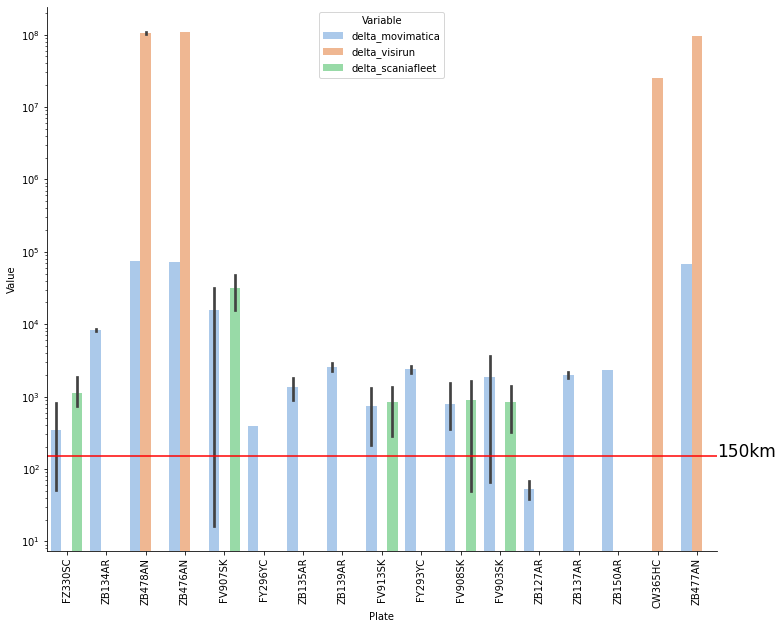

In [316]:
fig, ax = plt.subplots(figsize=(12, 10))

graph = sns.barplot(x='Plate', y='Value', hue='Variable', data=tidy, ax=ax, palette="pastel")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yscale('log')
ax.axhline(150, c="r")
ax.text(16.5, 145, "150km", size=17)

# for i, p in enumerate(graph.patches):
#     height = p.get_height()
# #     print(height)
#     graph.text(p.get_x()+p.get_width(), height*1.1,
#         tidy[["Plate", "Variable"]].value_counts().reset_index(drop=True)[i],ha="center")

# ax.set_ylim([0, 1e5])
sns.despine(fig)

plt.show()

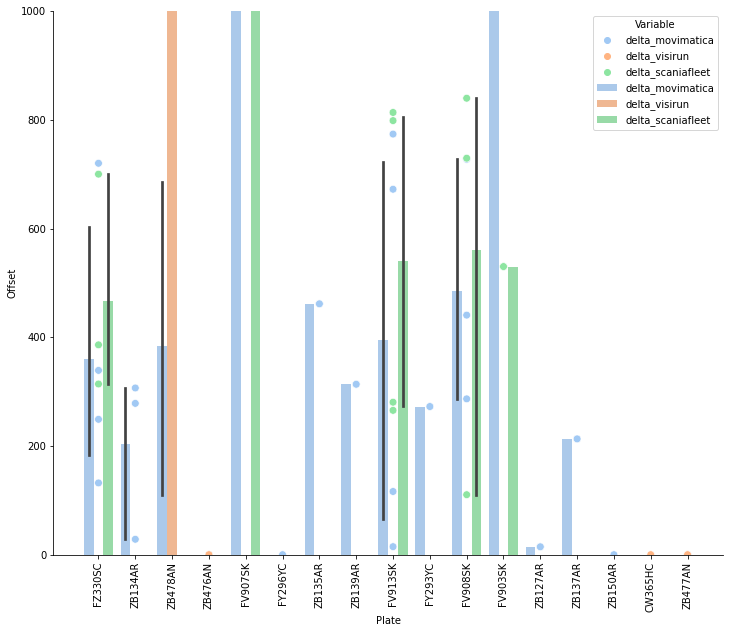

In [269]:
tidy["Offset"] = (tidy.Value - tidy.groupby(["Plate", "Variable"]).Value.transform('mean')).abs()
fig, ax = plt.subplots(figsize=(12, 10))

graph = sns.barplot(x='Plate', y='Offset', hue='Variable', data=tidy, ax=ax, palette="pastel", linewidth = 0.5)
sns.scatterplot(x='Plate', y='Offset', hue='Variable', data=tidy, ax=ax, palette="pastel", s=60)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# ax.axhline(150, c="r")
# ax.text(16.5, 145, "150km", size=17)
ax.set_ylim([0, 1e3])

sns.despine(fig)
plt.show()

## GPS

In [282]:
gps = pd.DataFrame([])
for f in tqdm(sorted(Path(f"SEA Data Lake/{odometer_dict['MOVIMATICA'][0]}").glob(f"*"))):
    gps = gps.append(pd.read_json(f))

100%|██████████| 1728/1728 [02:05<00:00, 13.80it/s]


In [358]:
fatture_ext[fatture_ext.Targa.isin(anomalies)]

,Targa,Telaio,Tipo_veicolo,Km,Apertura_commessa,Anno,Importo,Tipo_manutenzione,Manutenzione_struttura,Descrizione,Commenti


In [284]:
# gps.groupby(['position_place_state', 'plate']).sav.count()
anomalies = gps[gps.position_place_state.isin(['Basilicata', 'Sicilia', 'Calabria', 'Campania'])].plate.unique()
# gps.position_place_state.unique()
anomalies

array(['D6479', 'D6993', 'D7349', 'D7327', 'D7350', 'D6705', 'D6724',
       'D7351'], dtype=object)

Text(0.5, 1.0, "Distribuzione per le targhe 'anomale'")

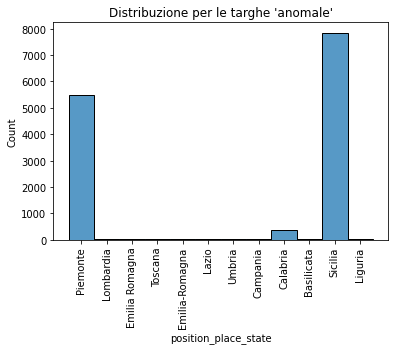

In [298]:
sns.histplot(gps[gps.plate.isin(anomalies)].position_place_state)
plt.xticks(rotation=90)
plt.title("Distribuzione per le targhe 'anomale'")

---
## Velocità
### Movimatica

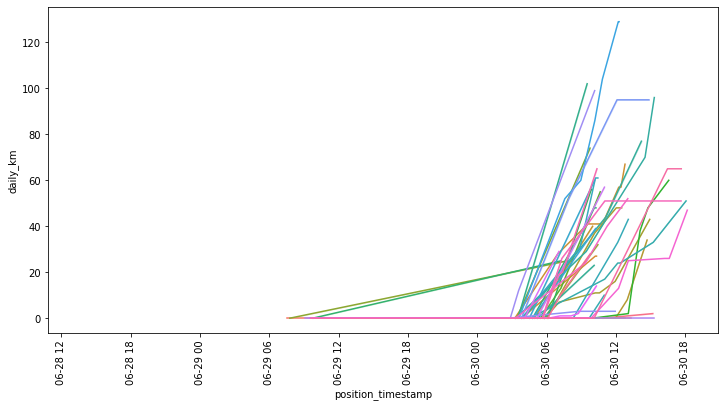

In [73]:
fig, ax = plt.subplots(figsize=(12,6))

g = sns.lineplot(data=df[df.plate.isin(df.plate.unique()[:])], x="position_timestamp", y="daily_km", hue="plate")
plt.xticks(rotation=90)
g.get_legend().remove()
plt.show()

In [74]:
df.position_timestamp.max()

Timestamp('2021-06-30 18:09:15+0000', tz='UTC')

In [27]:
df.position_timestamp.describe(datetime_is_numeric=True)

count                                    854
mean     2021-06-24 13:14:36.845434624+00:00
min                2020-10-03 08:31:04+00:00
25%                2021-06-30 02:02:26+00:00
50%                2021-06-30 07:49:05+00:00
75%                2021-06-30 10:20:20+00:00
max                2021-06-30 18:09:15+00:00
Name: position_timestamp, dtype: object

,index,alarm_id,alarm_name,alarm_priority,alarm_tipology_id,alarm_tipology_label,box,brand,chassis,customId,...,position_place_placeStr,position_place_state,position_place_zip,position_speed,position_timestamp,position_typology_id,position_typology_label,sav,typology_id,typology_label
58,58,0,,0,NONE,,D4256,Isuzu,TIS283439/18,,...,Guidonia Montecelio,Lazio,12,0,2020-10-03 08:31:04+00:00,communication,Comunicazione,TIS283439/18,COMPACTOR,Compattatore
119,58,0,,0,NONE,,D4256,Isuzu,TIS283439/18,,...,Guidonia Montecelio,Lazio,12,0,2020-10-03 08:31:04+00:00,communication,Comunicazione,TIS283439/18,COMPACTOR,Compattatore
180,58,0,,0,NONE,,D4256,Isuzu,TIS283439/18,,...,Guidonia Montecelio,Lazio,12,0,2020-10-03 08:31:04+00:00,communication,Comunicazione,TIS283439/18,COMPACTOR,Compattatore
241,58,0,,0,NONE,,D4256,Isuzu,TIS283439/18,,...,Guidonia Montecelio,Lazio,12,0,2020-10-03 08:31:04+00:00,communication,Comunicazione,TIS283439/18,COMPACTOR,Compattatore
302,58,0,,0,NONE,,D4256,Isuzu,TIS283439/18,,...,Guidonia Montecelio,Lazio,12,0,2020-10-03 08:31:04+00:00,communication,Comunicazione,TIS283439/18,COMPACTOR,Compattatore
363,58,0,,0,NONE,,D4256,Isuzu,TIS283439/18,,...,Guidonia Montecelio,Lazio,12,0,2020-10-03 08:31:04+00:00,communication,Comunicazione,TIS283439/18,COMPACTOR,Compattatore
424,58,0,,0,NONE,,D4256,Isuzu,TIS283439/18,,...,Guidonia Montecelio,Lazio,12,0,2020-10-03 08:31:04+00:00,communication,Comunicazione,TIS283439/18,COMPACTOR,Compattatore
485,58,0,,0,NONE,,D4256,Isuzu,TIS283439/18,,...,Guidonia Montecelio,Lazio,12,0,2020-10-03 08:31:04+00:00,communication,Comunicazione,TIS283439/18,COMPACTOR,Compattatore
546,58,0,,0,NONE,,D4256,Isuzu,TIS283439/18,,...,Guidonia Montecelio,Lazio,12,0,2020-10-03 08:31:04+00:00,communication,Comunicazione,TIS283439/18,COMPACTOR,Compattatore
607,58,0,,0,NONE,,D4256,Isuzu,TIS283439/18,,...,Guidonia Montecelio,Lazio,12,0,2020-10-03 08:31:04+00:00,communication,Comunicazione,TIS283439/18,COMPACTOR,Compattatore


In [39]:
(df.position_timestamp.dt.year == 2020)

0      False
1      False
2      False
3      False
4      False
       ...  
849    False
850    False
851     True
852    False
853    False
Name: position_timestamp, Length: 854, dtype: bool

---
---

# IP

In [6]:
dfip = pd.read_csv('SEA Data Lake/IP/IP_full.csv', index_col=0, dtype={"NumeroFattura": "category"})

for dt in ["Ricezione", "Transazione"]:
    dfip[f"Data{dt}"] = pd.to_datetime(pd.to_datetime(dfip[f"Data{dt}"]).astype(str) + " " + dfip[f"Ora{dt}"])
dfip.DataFattura = pd.to_datetime(dfip.DataFattura)

dfip = dfip[dfip.Targa.isin(targhe)].reset_index()

Shape of your Data Set loaded: (420, 52)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    52 Predictors classified...
        This does not include the Target column(s)
        23 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 28


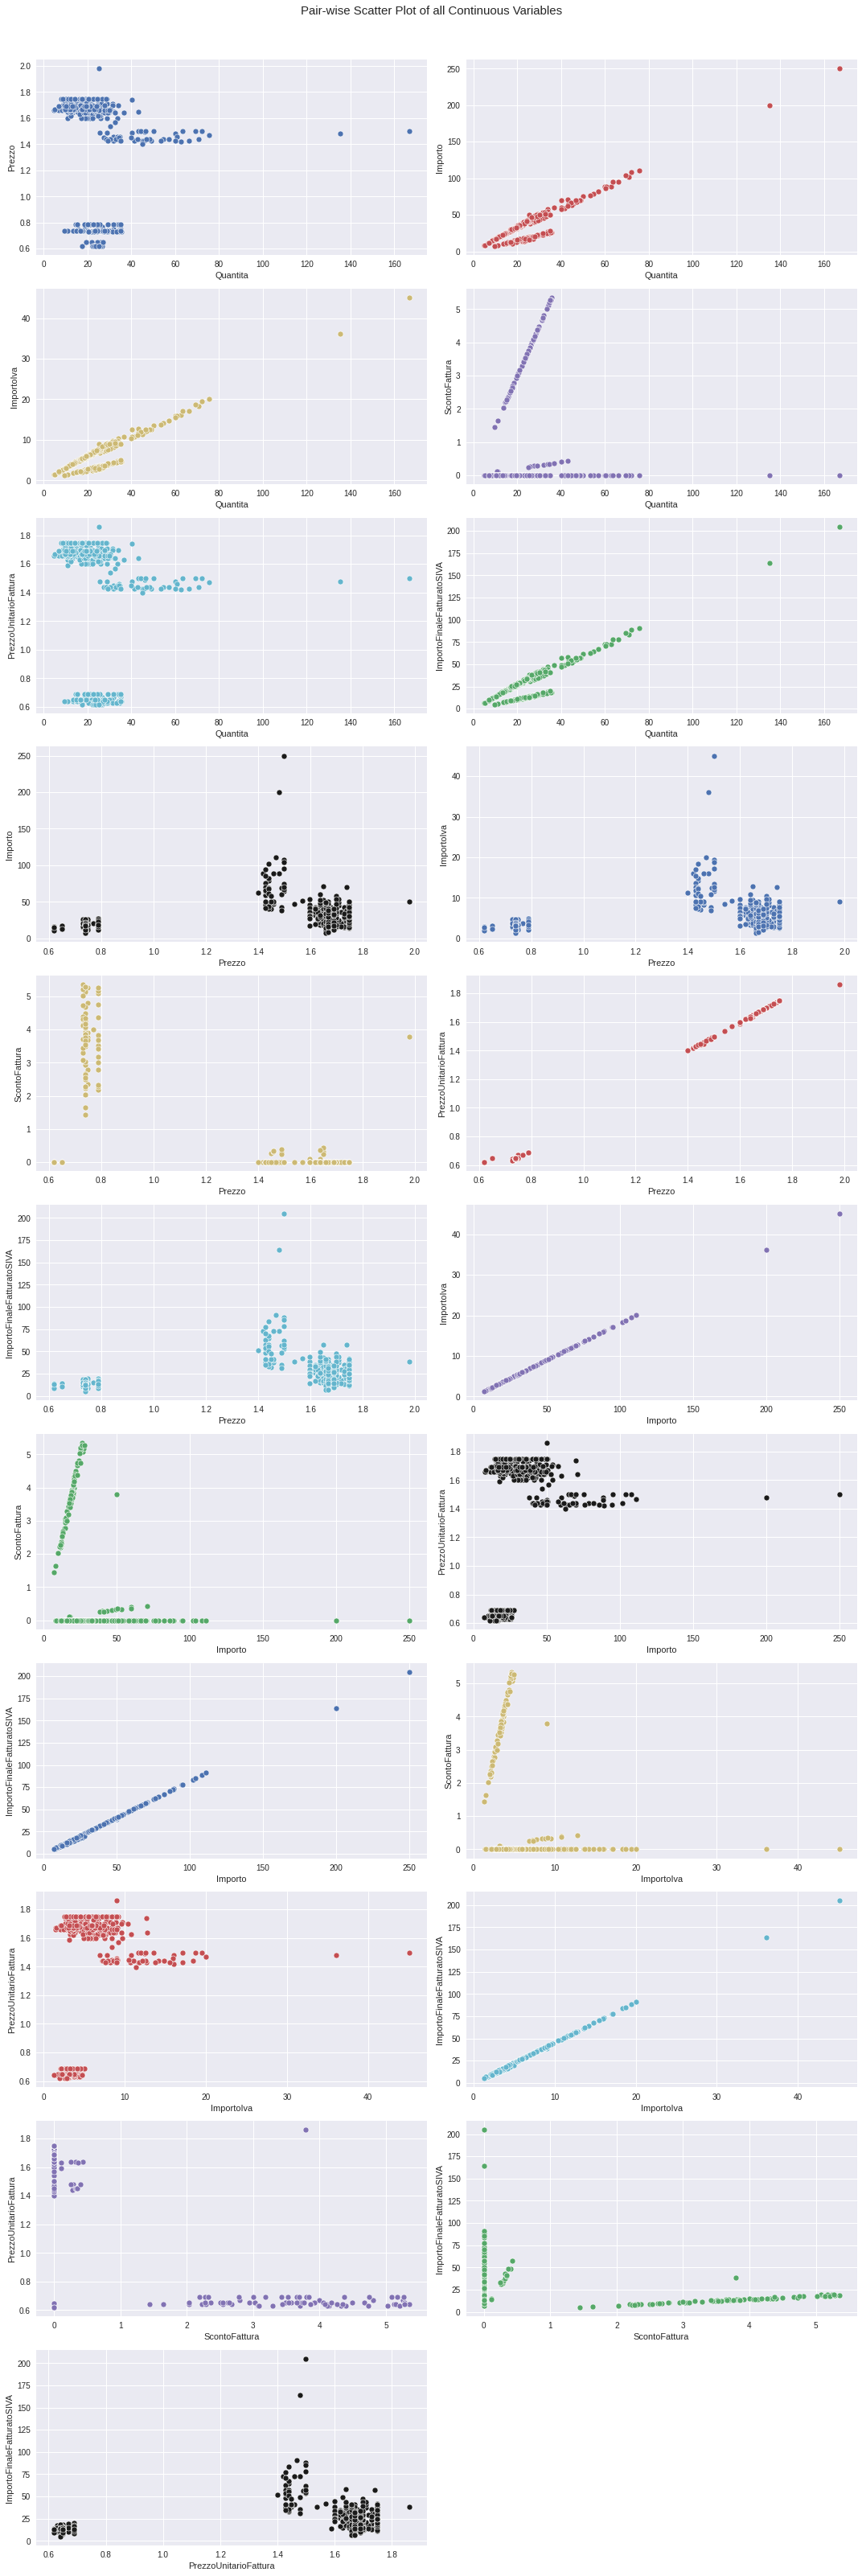

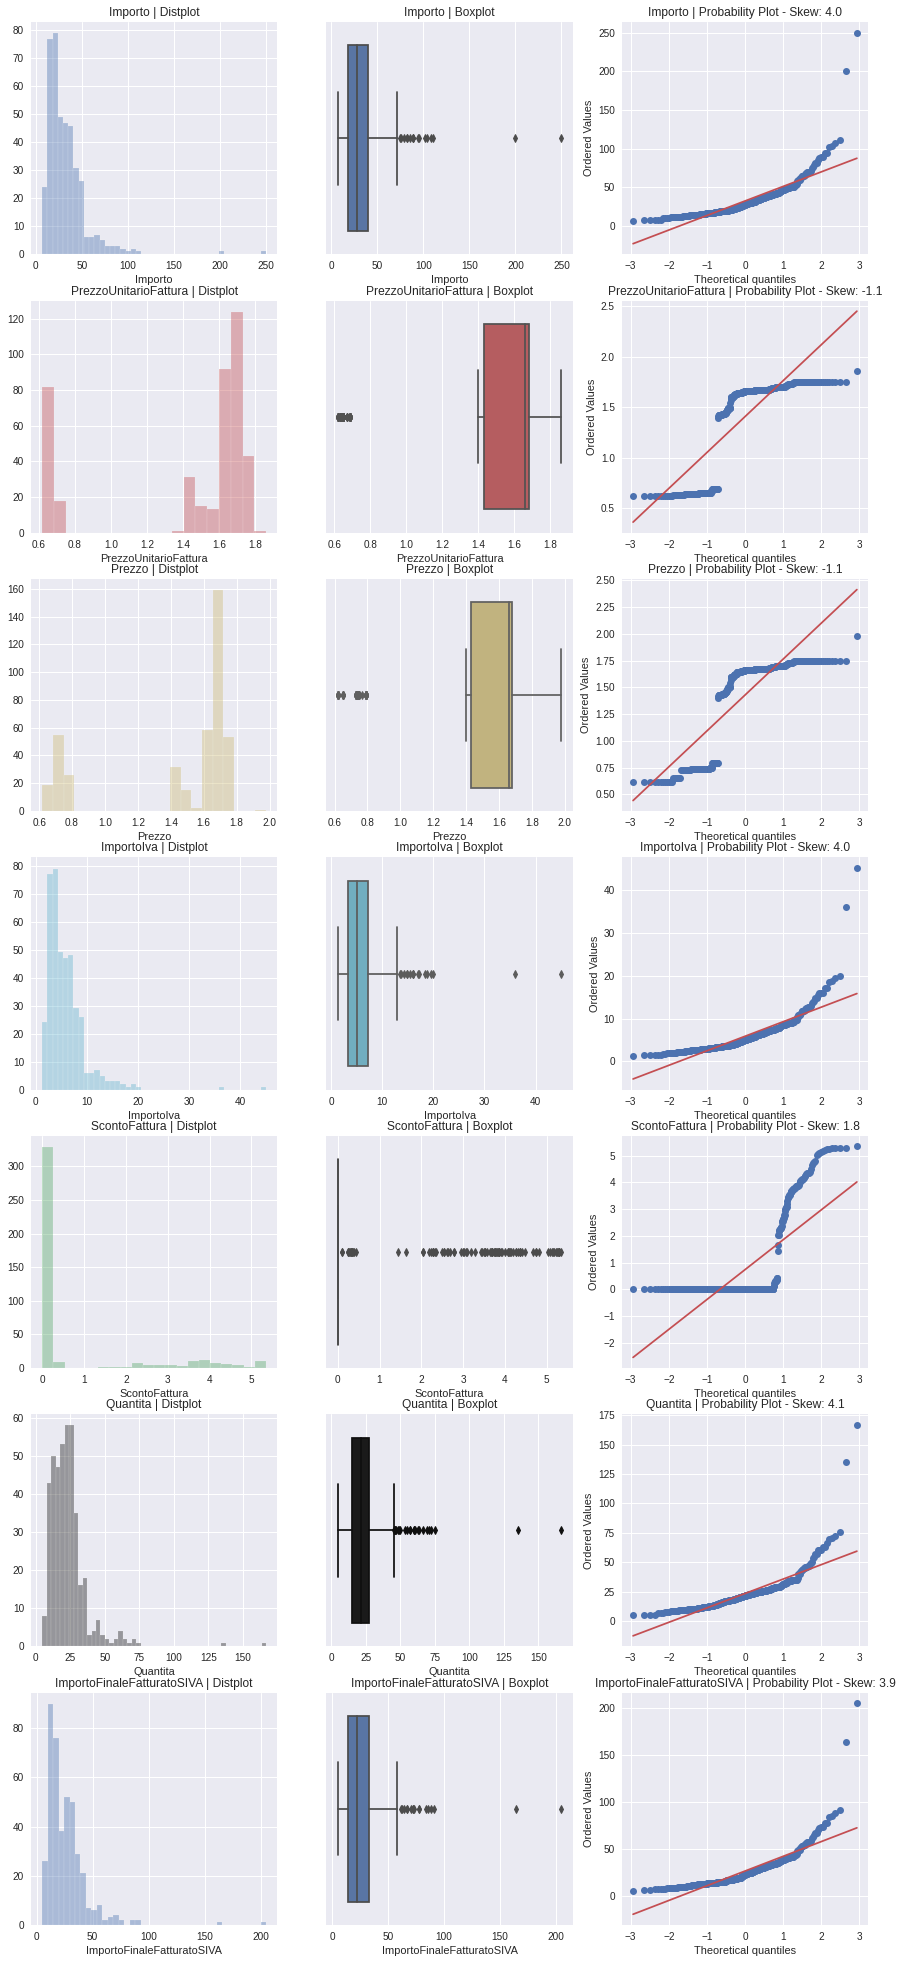

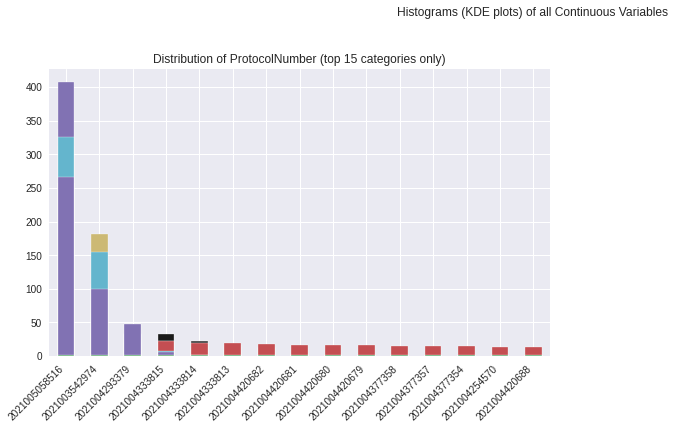

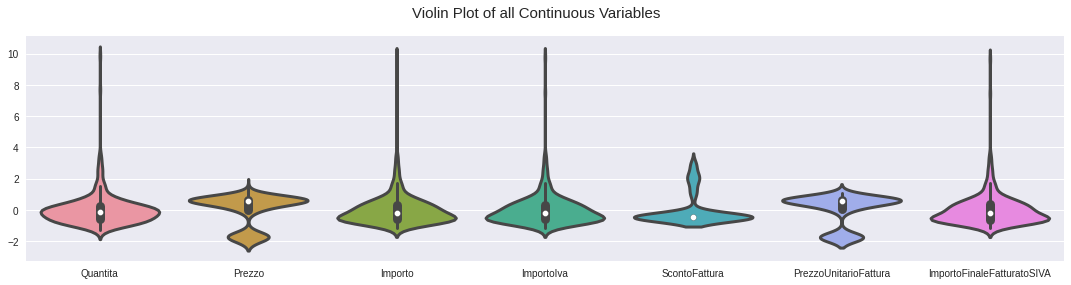

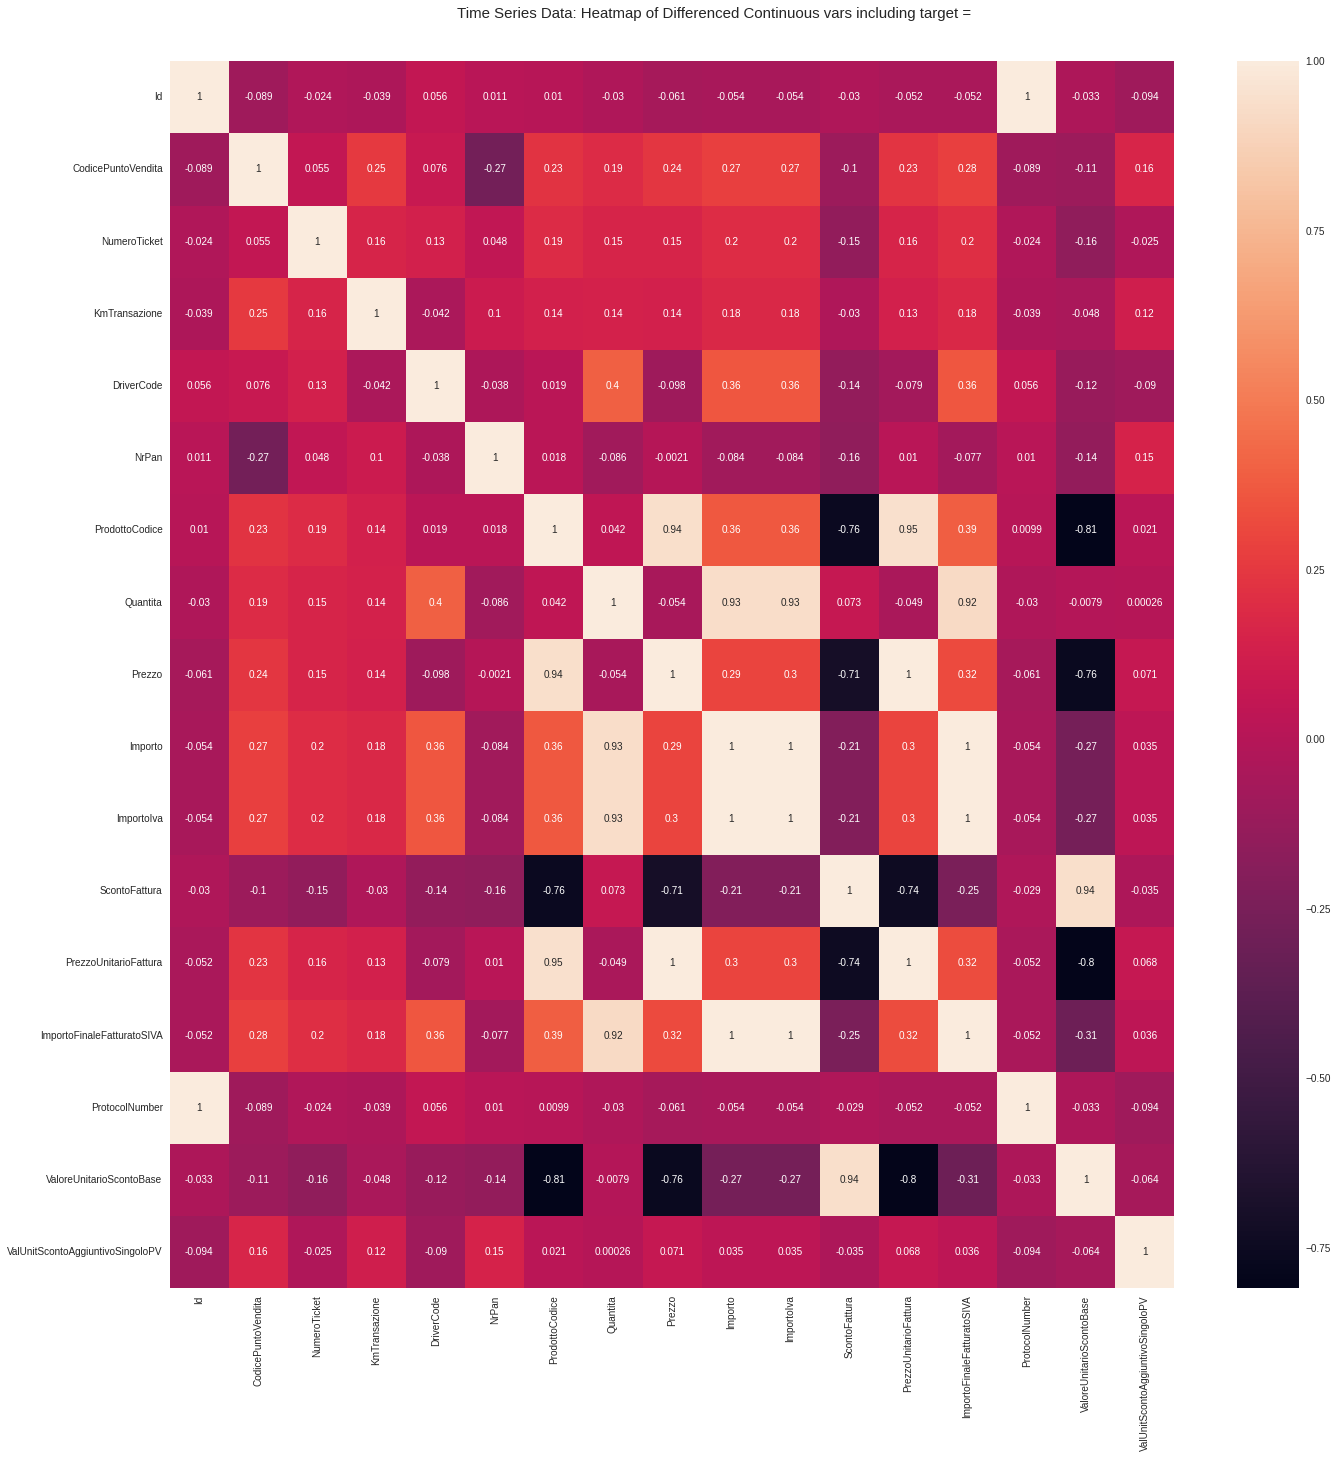

Could not draw Date Vars


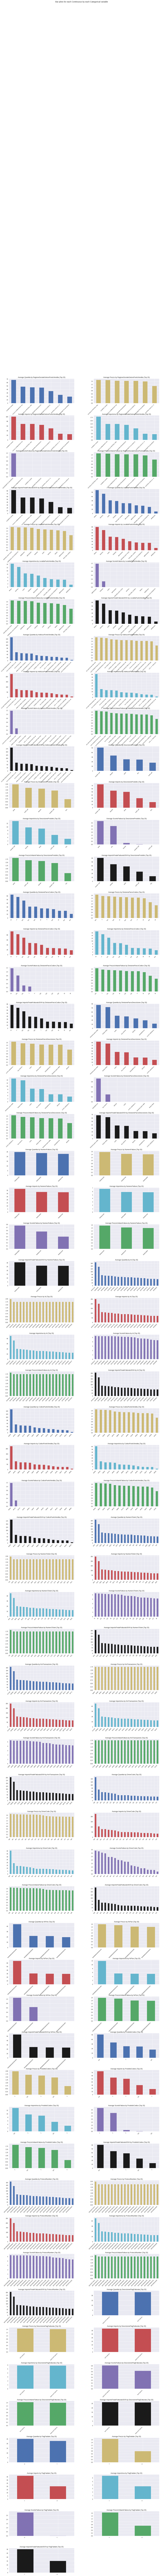

Time to run AutoViz (in seconds) = 33

 ###################### VISUALIZATION Completed ########################


,Id,CodicePuntoVendita,RagioneSocialeGetorePuntoVendita,LocalitaPuntoVendita,IndirizzoPuntoVendita,DataTransazione,NumeroTicket,KmTransazione,DriverCode,NrPan,ProdottoCodice,DescrizioneProdotto,Quantita,Prezzo,Importo,ImportoIva,NumeroFattura,DataFattura,ScontoFattura,PrezzoUnitarioFattura,ImportoFinaleFatturatoSIVA,DescrizioneFlagFatturata,DataRicezione,FlagFaidate,ProtocolNumber,ValoreUnitarioScontoBase,ValUnitScontoAggiuntivoSingoloPV,DivisioneParcoCodice,DivisioneParcoDescrizione
0,23297423,45617,NaN,VERBANIA LOC.FONDOTOCE,NaN,2021-06-07 05:09:00,998,62621,370,7000989062682003456,202,SsPb self,17.14,1.659,28.44,5.13,NaN,NaT,0.000,1.659,23.31,NON FATTURATA,2021-06-09 02:01:20,Y,2021005058516,0.00000,0.00,016,CONSERVCO
1,23297434,42665,MAZZONETTO MAURIZIO,MERGOZZO,LOCALITA CAMPONE,2021-06-07 05:45:00,200,55245,470,7000989062682005504,202,SsPb self,15.81,1.679,26.54,4.79,NaN,NaT,0.000,1.679,21.75,NON FATTURATA,2021-06-09 02:01:20,Y,2021005058527,0.00000,0.00,016,CONSERVCO
3,23297430,45576,NaN,TORINO,VIA CIGNA SNC,2021-06-07 08:11:00,3692,109787,322,7000989062682005504,203,Gasolio Self,27.61,1.449,40.01,7.21,NaN,NaT,0.276,1.439,32.57,NON FATTURATA,2021-06-09 02:01:20,Y,2021005058523,0.00000,0.01,001,VILLANOVA
4,23297428,41301,SANTINI LIVIO & C. SNC,RIVA DEL GARDA,"LOC. S. TOMASO,",2021-06-07 08:32:00,165,22413,720,7000989062682005504,4,GPL,26.84,0.619,16.61,3.00,NaN,NaT,0.000,0.619,13.61,NON FATTURATA,2021-06-09 02:01:20,N,2021005058521,0.00000,0.00,018,291010
5,23297427,46652,ACILIA CARBURANTI SNC,ROMA,VIA DI ACILIA 84,2021-06-07 08:34:00,388,62372,662,7000989062682004480,203,Gasolio Self,57.05,1.439,82.09,14.80,NaN,NaT,0.000,1.439,67.29,NON FATTURATA,2021-06-09 02:01:20,Y,2021005058520,0.00000,0.00,***,Divisione parco default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,23370260,42665,MAZZONETTO MAURIZIO,MERGOZZO,LOCALITA CAMPONE,2021-06-09 12:39:00,206,47069,359,7000989062682005504,202,SsPb self,10.24,1.689,17.30,3.12,NaN,NaT,0.000,1.689,14.18,NON FATTURATA,2021-06-11 02:01:20,Y,2021005146532,0.00000,0.00,016,CONSERVCO
14,23370252,42665,MAZZONETTO MAURIZIO,MERGOZZO,LOCALITA CAMPONE,2021-06-09 14:22:00,141,43997,516,7000989062682003456,4,GPL,23.54,0.739,17.40,3.14,NaN,NaT,3.530,0.650,12.54,NON FATTURATA,2021-06-11 02:01:20,N,2021005146524,0.15006,0.00,016,CONSERVCO
15,23370257,42665,MAZZONETTO MAURIZIO,MERGOZZO,LOCALITA CAMPONE,2021-06-09 14:23:00,1385,146600,437,7000989062682005504,202,SsPb self,24.27,1.689,41.00,7.39,NaN,NaT,0.000,1.689,33.61,NON FATTURATA,2021-06-11 02:01:20,Y,2021005146529,0.00000,0.00,016,CONSERVCO
16,23370247,48859,NaN,ALBA,CORSO ASTI SNC,2021-06-09 15:06:00,4151,77134,538,7000989062682002432,3,Gasolio,32.59,1.569,51.13,9.22,NaN,NaT,0.000,1.569,41.91,NON FATTURATA,2021-06-11 02:01:20,N,2021005146519,0.00000,0.00,005,ALBA


In [88]:
AV.AutoViz(filename=None, dfte=dfip)

In [7]:
dfip

,index,Id,Nazione,CodicePuntoVendita,RagioneSocialeGetorePuntoVendita,LocalitaPuntoVendita,IndirizzoPuntoVendita,Segno,DataTransazione,OraTransazione,NumeroTicket,KmTransazione,DriverCode,NrPan,Targa,ProdottoCodice,DescrizioneProdotto,Quantita,Valuta,Prezzo,Importo,ImportoIva,ClienteCodice,RagioneSocialeCliente,NumeroFattura,DataFattura,ValutaFattura,ScontoFattura,PrezzoUnitarioFattura,AliquotaIva,ImportoFinaleFatturatoSIVA,DescrizioneFlagFatturata,DescrizioneCircuito,DataRicezione,OraRicezione,DivisioneFatturazione,CardAccount,NomeDivisioneFatturazione,AdditionalInformations,SelfServedTransaction,FlagFaidate,ProtocolNumber,ValoreUnitarioScontoBase,ValoreUnitarioScontoBasePerc,ValoreUnitarioScZDRB,ValoreUnitarioScZARB,ValUnitScontoAggiuntivoSingoloPV,ValUnitScontoAggiuntivoClusterCL,DivisioneParcoCodice,DivisioneParcoDescrizione,ValoreUnitarioFeePerc,ImportoFeeCalcolata,CardFreeSpace
0,0,23297423,ITALIA,45617,NaN,VERBANIA LOC.FONDOTOCE,NaN,+,2021-06-07 05:09:00,05:09:00,998,62621,370,7000989062682003456,FV994FV,202,SsPb self,17.14,EUR,1.659,28.44,5.13,746150,SEA - SOLUZIONI ECO AMBIENTALI S,NaN,NaT,NaN,0.000,1.659,22,23.31,NON FATTURATA,IPPLUS,2021-06-09 02:01:20,02:01:20,0,9062682,NaN,NaN,0,Y,2021005058516,0.00000,0,0,0,0.00,0,016,CONSERVCO,0,0,NaN
1,1,23297434,ITALIA,42665,MAZZONETTO MAURIZIO,MERGOZZO,LOCALITA CAMPONE,+,2021-06-07 05:45:00,05:45:00,200,55245,470,7000989062682005504,FV996FV,202,SsPb self,15.81,EUR,1.679,26.54,4.79,746150,SEA - SOLUZIONI ECO AMBIENTALI S,NaN,NaT,NaN,0.000,1.679,22,21.75,NON FATTURATA,IPPLUS,2021-06-09 02:01:20,02:01:20,0,9062682,NaN,NaN,0,Y,2021005058527,0.00000,0,0,0,0.00,0,016,CONSERVCO,0,0,NaN
2,3,23297430,ITALIA,45576,NaN,TORINO,VIA CIGNA SNC,+,2021-06-07 08:11:00,08:11:00,3692,109787,322,7000989062682005504,ZB373AN,203,Gasolio Self,27.61,EUR,1.449,40.01,7.21,746150,SEA - SOLUZIONI ECO AMBIENTALI S,NaN,NaT,NaN,0.276,1.439,22,32.57,NON FATTURATA,IPPLUS,2021-06-09 02:01:20,02:01:20,0,9062682,NaN,NaN,0,Y,2021005058523,0.00000,0,0,0,0.01,0,001,VILLANOVA,0,0,NaN
3,4,23297428,ITALIA,41301,SANTINI LIVIO & C. SNC,RIVA DEL GARDA,"LOC. S. TOMASO,",+,2021-06-07 08:32:00,08:32:00,165,22413,720,7000989062682005504,FY299YC,4,GPL,26.84,EUR,0.619,16.61,3.00,746150,SEA - SOLUZIONI ECO AMBIENTALI S,NaN,NaT,NaN,0.000,0.619,22,13.61,NON FATTURATA,IPPLUS,2021-06-09 02:01:20,02:01:20,0,9062682,NaN,NaN,0,N,2021005058521,0.00000,0,0,0,0.00,0,018,291010,0,0,NaN
4,5,23297427,ITALIA,46652,ACILIA CARBURANTI SNC,ROMA,VIA DI ACILIA 84,+,2021-06-07 08:34:00,08:34:00,388,62372,662,7000989062682004480,ZB130AR,203,Gasolio Self,57.05,EUR,1.439,82.09,14.80,746150,SEA - SOLUZIONI ECO AMBIENTALI S,NaN,NaT,NaN,0.000,1.439,22,67.29,NON FATTURATA,IPPLUS,2021-06-09 02:01:20,02:01:20,0,9062682,NaN,NaN,0,Y,2021005058520,0.00000,0,0,0,0.00,0,***,Divisione parco default,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,12,23370260,ITALIA,42665,MAZZONETTO MAURIZIO,MERGOZZO,LOCALITA CAMPONE,+,2021-06-09 12:39:00,12:39:00,206,47069,359,7000989062682005504,FV985FV,202,SsPb self,10.24,EUR,1.689,17.30,3.12,746150,SEA - SOLUZIONI ECO AMBIENTALI S,NaN,NaT,NaN,0.000,1.689,22,14.18,NON FATTURATA,IPPLUS,2021-06-11 02:01:20,02:01:20,0,9062682,NaN,NaN,0,Y,2021005146532,0.00000,0,0,0,0.00,0,016,CONSERVCO,0,0,NaN
416,14,23370252,ITALIA,42665,MAZZONETTO MAURIZIO,MERGOZZO,LOCALITA CAMPONE,+,2021-06-09 14:22:00,14:22:00,141,43997,516,7000989062682003456,FV997FV,4,GPL,23.54,EUR,0.739,17.40,3.14,746150,SEA - SOLUZIONI ECO AMBIENTALI S,NaN,NaT,NaN,3.530,0.650,22,12.54,NON FATTURATA,IPPLUS,2021-06-11 02:01:20,02:01:20,0,9062682,NaN,NaN,0,N,2021005146524,0.15006,0,0,0,0.00,0,016,CONSERVCO,0,0,NaN
417,15,23370257,ITALIA,42665,MAZZONETTO MAURIZIO,MERGOZZO,LOCALITA CAMPONE,+,2021-06-09 14:23:00,14:23:00,1385,146600,437,7000989062682005504,EN971TN,202,SsPb self,24.27,EUR,1.689,41.00,7.3

In [8]:
dfip = dfip.join(veicoli.set_index("plate")[["Alimentazione", "Tipo", "Cantiere"]],
                 on="Targa", how="left")

In [415]:
veic_tofind = veicoli[veicoli.plate.isin(dfip.Targa.unique())].xs('VISIRUN', level=1).index.to_list()
# date_range = pd.to_datetime(dfip.DataTransazione).describe(datetime_is_numeric=True)[["min", "max"]].to_list()

In [132]:
vr_path= Path('SEA Data Lake/VISIRUN/CurrentPosition')
visirun_data = {}
for plate in tqdm(veic_tofind):
    visirun_data[plate] = pd.DataFrame([])
    date = dfip[dfip.Targa == plate].DataTransazione.min().date()
    while date < dfip[dfip.Targa == plate].DataTransazione.max().date():
        for curr_file in sorted(vr_path.glob(f"{date}*{plate}*")):
            visirun_data[plate] = visirun_data[plate].append(pd.read_json(curr_file, typ='series'), ignore_index=True)
        date += pd.Timedelta(days=1) 
        

100%|██████████| 6/6 [03:45<00:00, 37.64s/it]


In [219]:
ip_visirun = pd.DataFrame([])
for k in visirun_data:
    ip_visirun = ip_visirun.append(visirun_data[k], ignore_index=True)

ip_visirun.lastCommunicationDatetime = pd.to_datetime(ip_visirun.lastCommunicationDatetime, errors = 'coerce')
ip_visirun.datestamp = pd.to_datetime(ip_visirun.datestamp, errors = 'coerce')
ip_visirun.vehiclePlate = ip_visirun.vehiclePlate.str.strip()

In [138]:
for k in visirun_data:
    print("{3}[{0}]:\t {1}\t{2}".format(len(visirun_data[k]), visirun_data[k].datestamp.min().date(), visirun_data[k].datestamp.max().date(), k))

CN433CA[515]:	 2021-04-27	2021-06-08
EG181YE[209]:	 2021-04-26	2021-05-14
ZB373AN[1151]:	 2021-04-27	2021-07-31
ZB473AN[885]:	 2020-10-03	2020-10-03
ZB475AN[1230]:	 2021-04-27	2021-08-16
ZB477AN[902]:	 2021-04-28	2021-07-12


In [156]:
ip_visirun.groupby("vehiclePlate").agg({"datestamp":["min", "max"],
                                        "lastCommunicationDatetime":["min", "max"],
                                       }).apply(lambda x: pd.to_datetime(x).dt.strftime("%d-%m %H:%M"))

datestamp              lastCommunicationDatetime             
                      min          max                       min          max
vehiclePlate                                                                 
CN433CA       27-04 08:56  08-06 10:54               27-04 08:56  08-06 18:34
EG181YE       26-04 08:58  14-05 10:11               26-04 09:32  14-05 11:41
ZB373AN       27-04 11:06  31-07 23:52               27-04 11:06  01-08 18:27
ZB473AN       03-10 03:43  03-10 03:43                       NaN          NaN
ZB475AN       27-04 11:10  16-08 12:20               27-04 11:10  16-08 17:08
ZB477AN       28-04 03:31  12-07 17:43               28-04 07:31  12-07 19:03

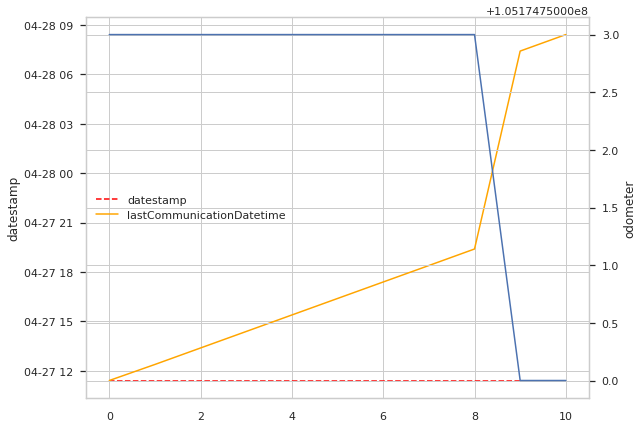

In [196]:
fig, ax = plt.subplots(figsize=(9,7))
thisday = ip_visirun[ip_visirun.datestamp == "2021-04-27 11:25:20"].drop_duplicates().reset_index()
sns.lineplot(ax=ax, data=thisday.datestamp, label="datestamp", linestyle='--', color="red")
sns.lineplot(ax=ax, data=thisday.lastCommunicationDatetime, label="lastCommunicationDatetime", color="orange")
plt.legend(loc="center left")
ax2 = ax.twinx()
sns.lineplot(data=thisday.odometer, ax=ax2)
plt.show()

In [306]:
ip_visirun_wm = ip_visirun.groupby('vehiclePlate').agg({"workMinutes": [lambda x: np.max(x)-np.min(x)]}).droplevel(1, axis=1)

--- 
## Same for Movimatica

In [254]:
veic_tofind2 = veicoli[veicoli.plate.isin(dfip.Targa.unique())].xs('MOVIMATICA', level=1).index.to_list()
veic_tofind2
vr_path= Path('SEA Data Lake/MOVIMATICA/vehicles')

ip_movimatica_wm = pd.DataFrame([])
for plate in tqdm(veic_tofind2):
    engineh_min = np.inf
    engineh_max = 0
    
    date = dfip[dfip.Targa == plate].DataTransazione.min().date()
    while date < dfip[dfip.Targa == plate].DataTransazione.max().date():
        for curr_file in sorted(vr_path.glob(f"{date}*")):
            carry = pd.read_json(curr_file)
            val = carry[(carry.plate==plate)&(pd.to_datetime(carry.position_timestamp).dt.date==date)]
            if len(val) < 1:
                continue
            val = val.engineHours.values[0]
            engineh_max = val if val > engineh_max else engineh_max
            engineh_min = val if val < engineh_min else engineh_min
        date += pd.Timedelta(days=1)
    ip_movimatica_wm = ip_movimatica_wm.append(pd.Series([plate, engineh_min, engineh_max]), ignore_index=True)

ip_movimatica_wm = ip_movimatica_wm.set_index(0)      
ip_movimatica_wm["workMinutes"] = (ip_movimatica_wm[2] - ip_movimatica_wm[1])*60

100%|██████████| 5/5 [01:09<00:00, 13.90s/it]


In [308]:
ip_movimatica_wm

,1,2,workMinutes
0,,,
ZB130AR,2519.0,3113.0,35640.0
ZB373AN,2443.0,2786.0,20580.0
ZB473AN,inf,0.0,-inf
ZB475AN,4244.0,4639.0,23700.0
ZB477AN,3497.0,3731.0,14040.0


---

In [309]:
all_wm = ip_visirun_wm.append(ip_movimatica_wm.workMinutes.to_frame())

In [403]:
tmpip = dfip.drop(dfip.groupby("Targa").DataTransazione.idxmax()).groupby(["Targa", "Alimentazione", "Tipo", "Cantiere"]).agg({
    "Quantita": ["sum", "count"],
    "DataTransazione": ["min", "max"],
}).droplevel(0, axis=1)

tmpip["delta_t"] = (tmpip['max'] - tmpip['min']).dt.days
tmpip["Q_perday"] = tmpip["sum"] / tmpip.delta_t

tmpip = tmpip.sort_values(by="Q_perday").reset_index()
tmpip = tmpip.join(all_wm, on="Targa")

In [456]:
tmpip = tmpip[(~tmpip.workMinutes.isin([0, np.inf, -np.inf]))&(tmpip.workMinutes.notna())].reset_index(drop=True)
tmpip["Q/workMinutes"] = tmpip['sum'] / tmpip.workMinutes
# tmpip["Q/workMinutes"] = tmpip.Q_perday / tmpip.workMinutes
tmpip

,Targa,Alimentazione,Tipo,Cantiere,sum,count,min,max,delta_t,Q_perday,workMinutes,Q/workDay
0,EG181YE,BENZINA,VASCA,ORNAVASSO,33.45,3,2021-04-22 12:14:00,2021-05-06 11:19:00,13,2.573077,809.0,59.540173
1,CN433CA,DIESEL,VASCA,ALBA,59.85,2,2021-04-21 11:38:00,2021-05-09 09:21:00,17,3.520588,4660.0,18.494421
2,ZB373AN,DIESEL,MINI COMPATTATORE,PORTA PALAZZO,740.64,24,2021-04-21 15:04:00,2021-08-02 14:50:00,102,7.261176,24803.0,42.999702
3,ZB373AN,DIESEL,MINI COMPATTATORE,PORTA PALAZZO,740.64,24,2021-04-21 15:04:00,2021-08-02 14:50:00,102,7.261176,20580.0,51.823207
4,ZB475AN,DIESEL,MINI COMPATTATORE,ROMA,732.04,16,2021-04-27 06:28:00,2021-07-24 12:18:00,88,8.318636,22946.0,45.939929
5,ZB475AN,DIESEL,MINI COMPATTATORE,ROMA,732.04,16,2021-04-27 06:28:00,2021-07-24 12:18:00,88,8.318636,23700.0,44.478380
6,ZB477AN,DIESEL,MINI COMPATTATORE,ROMA,478.40,14,2021-04-28 12:59:00,2021-06-15 09:14:00,47,10.178723,15322.0,44.961232
7,ZB477AN,DIESEL,MINI COMPATTATORE,ROMA,478.40,14,2021-04-28 12:59:00,2021-06-15 09:14:00,47,10.178723,14040.0,49.066667
8,ZB130AR,DIESEL,MINI COMPATTATORE,ROMA,2025.40,36,2021-04-21 11:01:00,2021-08-17 10:59:00,117,17.311111,35640.0,81.834343


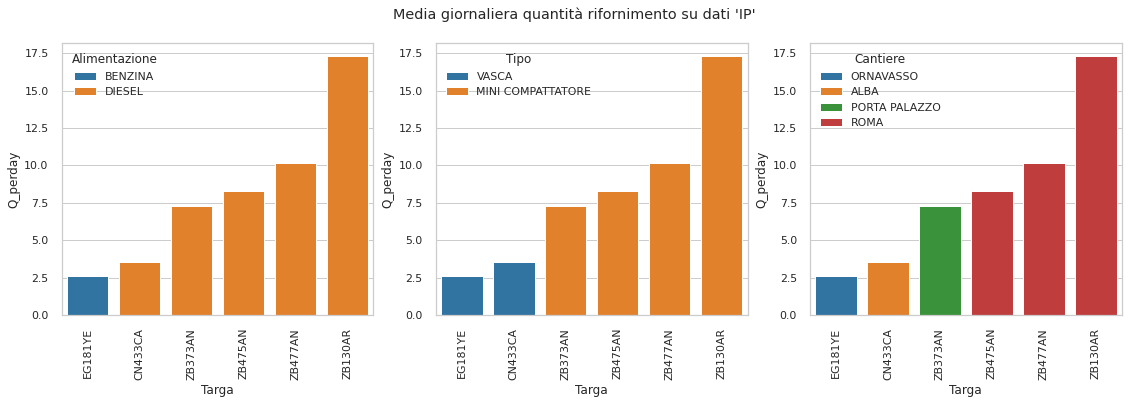

In [457]:
fig, ax = plt.subplots(1, 3, figsize=(19, 5))

for i, col in enumerate(["Alimentazione", "Tipo", "Cantiere"]):
    sns.barplot(ax=ax[i], data=tmpip, x="Targa", y="Q_perday", hue=col, palette="tab10", dodge=False)
    ax[i].tick_params(axis='x', rotation=90)

g = fig.suptitle("Media giornaliera quantità rifornimento su dati 'IP'")
plt.show()

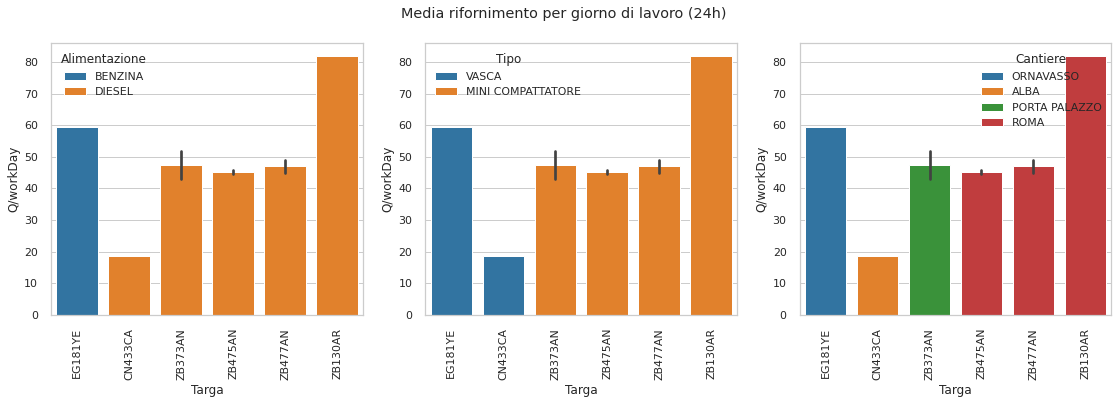

In [458]:
fig, ax = plt.subplots(1, 3, figsize=(19, 5))

for i, col in enumerate(["Alimentazione", "Tipo", "Cantiere"]):
    sns.barplot(ax=ax[i], data=tmpip, x="Targa", y="Q/workDay", hue=col, palette="tab10", dodge=False)
    ax[i].tick_params(axis='x', rotation=90)

g = fig.suptitle("Media rifornimento per giorno di lavoro (24h)")
plt.show()

In [350]:
fatture_ext = pd.read_excel("excels/eventi_manutenzioni_esterne (da fatture).xlsx", sheet_name=0)
fatture_ext = fatture_ext[fatture_ext.Targa.isin(tmpip.Targa)]
fatture_ext = fatture_ext.join(tmpip.set_index('Targa')[['min', 'max']], on='Targa')

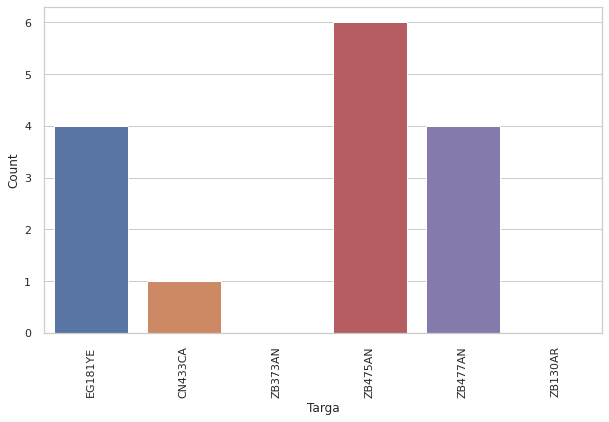

In [360]:
fig, ax = plt.subplots(figsize=(10,6))
g = sns.barplot(data=tmpip.join(fatture_ext.groupby('Targa').Km.count(), on="Targa").fillna(0), x="Targa", y="Km")
g.set_ylabel("Count")
g.tick_params(axis='x', rotation=90)

---
## _getFleetKpi_

In [371]:
[f for f in Path('SEA Data Lake/VISIRUN').iterdir() if 'kpi' in f.stem.lower()]

[PosixPath('SEA Data Lake/VISIRUN/KpiSummary'),
 PosixPath('SEA Data Lake/VISIRUN/FleetKpi')]

In [423]:
data_kpi = pd.DataFrame([])
for f in tqdm(sorted(Path('SEA Data Lake/VISIRUN/FleetKpi/').glob('2021-06-19-*'))):
    tmp = pd.read_json(f)
    data_kpi = data_kpi.append(tmp[tmp.vehiclePlate.isin(tmpip.Targa.unique())].sort_values(by='remoteUnitSerial'))

100%|██████████| 264/264 [00:04<00:00, 62.22it/s] 


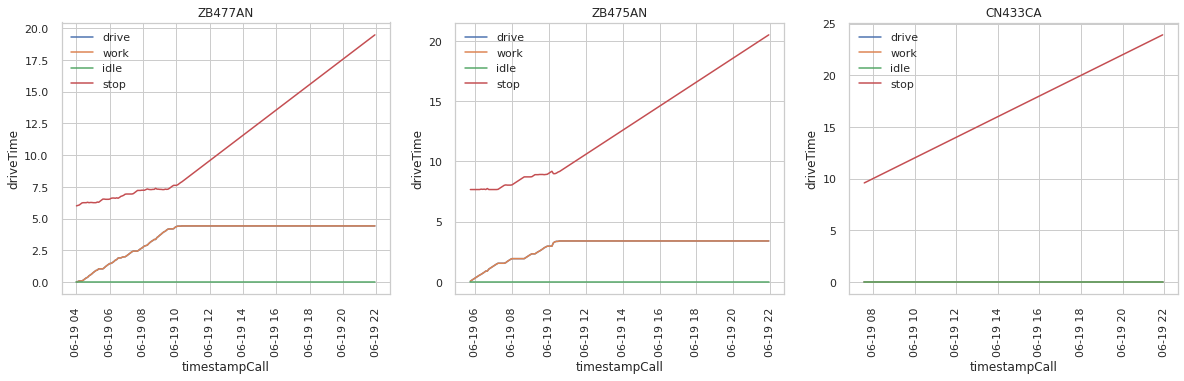

In [474]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
for pl, ax in zip(data_kpi.vehiclePlate.unique(), axs):
    tmp = data_kpi.set_index(['vehiclePlate', 'timestampCall']).xs(pl)
    tmp
    for t in ["drive", "work", "idle", "stop"]:
        tmp[f"{t}Time"] = tmp[f"{t}Time"].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60 + int(x[2])/3600)
        sns.lineplot(ax=ax, data=tmp, y=tmp[f"{t}Time"], x=tmp.index, label=t)
    ax.tick_params(axis='x', rotation=90)
    ax.set_title(pl)
plt.legend()


In [451]:
tmp

,remoteUnitSerial,vehicleName,driveTime,workTime,idleTime,stopTime,distance,consumption,wastedFuel
timestampCall,,,,,,,,,
2021-06-19 04:00:00.615617400+00:00,60025917,ZB477AN Azimut 6,0.000000,0.000000,0.0,6.000000,0,0,0
2021-06-19 04:05:00.515573500+00:00,60025917,ZB477AN Azimut 6,0.033333,0.033333,0.0,6.033333,1403,0,0
2021-06-19 04:10:00.530003800+00:00,60025917,ZB477AN Azimut 6,0.083333,0.083333,0.0,6.066667,2400,0,0
2021-06-19 04:15:00.554829400+00:00,60025917,ZB477AN Azimut 6,0.083333,0.083333,0.0,6.150000,2400,0,0
2021-06-19 04:20:00.618795+00:00,60025917,ZB477AN Azimut 6,0.083333,0.083333,0.0,6.233333,2400,0,0
...,...,...,...,...,...,...,...,...,...
2021-06-19 21:35:00.606252500+00:00,60025917,ZB477AN Azimut 6,4.416667,4.416667,0.0,19.150000,69575,0,0
2021-06-19 21:40:00.685103700+00:00,60025917,ZB477AN Azimut 6,4.416667,4.416667,0.0,19.233333,69575,0,0
2021-06-19 21:45:00.600122600+00:00,60025917,ZB477AN Azimut 6,4.416667,4.416667,0.0,19.316667,69575,0,0


In [89]:
path = Path("SEA Data Lake/MOVIMATICA/vehicles/")
df_mov = pd.DataFrame([])
for f in path.glob('2021-06-07*'):
    df_mov = df_mov.append(pd.read_json(f))
df_mov = df_mov[df_mov.plate.isin(targhe)]

for plate in tqdm(veic_tofind2):
    engineh_min = np.inf
    engineh_max = 0
    
    date = dfip[dfip.Targa == plate].DataTransazione.min().date()
    while date < dfip[dfip.Targa == plate].DataTransazione.max().date():
        for curr_file in sorted(vr_path.glob(f"{date}*")):
            carry = pd.read_json(curr_file)
            val = carry[(carry.plate==plate)&(pd.to_datetime(carry.position_timestamp).dt.date==date)]
            if len(val) < 1:
                continue
            val = val.engineHours.values[0]
            engineh_max = val if val > engineh_max else engineh_max
            engineh_min = val if val < engineh_min else engineh_min
        date += pd.Timedelta(days=1)
    ip_movimatica_wm = ip_movimatica_wm.append(pd.Series([plate, engineh_min, engineh_max]), ignore_index=True)

In [388]:
str(dfip.DataTransazione.max().date())

'2021-08-19'

# Dipendenti

In [32]:
import re
df_dipendenti = pd.read_csv("dataset/DIPENDENTI_DipendentiList.csv", index_col=0).drop_duplicates()

In [ ]:
df_dipendenti.merge()

In [29]:
ls "SEA Data Lake/IP"

2021-05-25-RifornimentiIp.json  2021-07-03-RifornimentiIp.json
2021-05-28-RifornimentiIp.json  2021-07-05-RifornimentiIp.json
2021-06-03-RifornimentiIp.json  2021-07-08-RifornimentiIp.json
2021-06-07-RifornimentiIp.json  2021-07-15-RifornimentiIp.json
2021-06-08-RifornimentiIp.json  2021-07-16-RifornimentiIp.json
2021-06-09-RifornimentiIp.json  2021-07-21-RifornimentiIp.json
2021-06-10-RifornimentiIp.json  2021-07-23-RifornimentiIp.json
2021-06-11-RifornimentiIp.json  2021-07-26-RifornimentiIp.json
2021-06-13-RifornimentiIp.json  2021-08-04-RifornimentiIp.json
2021-06-14-RifornimentiIp.json  2021-08-11-RifornimentiIp.json
2021-06-17-RifornimentiIp.json  2021-08-19-RifornimentiIp.json
2021-06-18-RifornimentiIp.json  2021-08-21-RifornimentiIp.json
2021-06-21-RifornimentiIp.json  IP_full.csv
2021-07-02-RifornimentiIp.json


In [30]:
pd.read_csv("SEA Data Lake/IP/IP_full.csv")

,Unnamed: 0,Id,Nazione,CodicePuntoVendita,RagioneSocialeGetorePuntoVendita,LocalitaPuntoVendita,IndirizzoPuntoVendita,Segno,DataTransazione,OraTransazione,NumeroTicket,KmTransazione,DriverCode,NrPan,Targa,ProdottoCodice,DescrizioneProdotto,Quantita,Valuta,Prezzo,Importo,ImportoIva,ClienteCodice,RagioneSocialeCliente,NumeroFattura,DataFattura,ValutaFattura,ScontoFattura,PrezzoUnitarioFattura,AliquotaIva,ImportoFinaleFatturatoSIVA,DescrizioneFlagFatturata,DescrizioneCircuito,DataRicezione,OraRicezione,DivisioneFatturazione,CardAccount,NomeDivisioneFatturazione,AdditionalInformations,SelfServedTransaction,FlagFaidate,ProtocolNumber,ValoreUnitarioScontoBase,ValoreUnitarioScontoBasePerc,ValoreUnitarioScZDRB,ValoreUnitarioScZARB,ValUnitScontoAggiuntivoSingoloPV,ValUnitScontoAggiuntivoClusterCL,DivisioneParcoCodice,DivisioneParcoDescrizione,ValoreUnitarioFeePerc,ImportoFeeCalcolata,CardFreeSpace
0,0,23297423,ITALIA,45617,NaN,VERBANIA LOC.FONDOTOCE,NaN,+,2021-06-07T00:00:00,05:09:00,998,62621,370,7000989062682003456,FV994FV,202,SsPb self,17.14,EUR,1.659,28.44,5.13,746150,SEA - SOLUZIONI ECO AMBIENTALI S,NaN,NaN,NaN,0.000,1.659,22,23.31,NON FATTURATA,IPPLUS,2021-06-09T00:00:00,02:01:20,0,9062682,NaN,NaN,0,Y,2021005058516,0.00000,0,0,0,0.00,0,016,CONSERVCO,0,0,NaN
1,1,23297434,ITALIA,42665,MAZZONETTO MAURIZIO,MERGOZZO,LOCALITA CAMPONE,+,2021-06-07T00:00:00,05:45:00,200,55245,470,7000989062682005504,FV996FV,202,SsPb self,15.81,EUR,1.679,26.54,4.79,746150,SEA - SOLUZIONI ECO AMBIENTALI S,NaN,NaN,NaN,0.000,1.679,22,21.75,NON FATTURATA,IPPLUS,2021-06-09T00:00:00,02:01:20,0,9062682,NaN,NaN,0,Y,2021005058527,0.00000,0,0,0,0.00,0,016,CONSERVCO,0,0,NaN
2,2,23297419,ITALIA,45576,NaN,TORINO,VIA CIGNA SNC,+,2021-06-07T00:00:00,07:43:00,3691,184244,333,7000989062682002432,DP959ZZ,203,Gasolio Self,45.55,EUR,1.449,66.00,11.90,746150,SEA - SOLUZIONI ECO AMBIENTALI S,NaN,NaN,NaN,0.456,1.439,22,53.73,NON FATTURATA,IPPLUS,2021-06-09T00:00:00,02:01:20,0,9062682,NaN,NaN,0,Y,2021005058512,0.00000,0,0,0,0.01,0,001,VILLANOVA,0,0,NaN
3,3,23297430,ITALIA,45576,NaN,TORINO,VIA CIGNA SNC,+,2021-06-07T00:00:00,08:11:00,3692,109787,322,7000989062682005504,ZB373AN,203,Gasolio Self,27.61,EUR,1.449,40.01,7.21,746150,SEA - SOLUZIONI ECO AMBIENTALI S,NaN,NaN,NaN,0.276,1.439,22,32.57,NON FATTURATA,IPPLUS,2021-06-09T00:00:00,02:01:20,0,9062682,NaN,NaN,0,Y,2021005058523,0.00000,0,0,0,0.01,0,001,VILLANOVA,0,0,NaN
4,4,23297428,ITALIA,41301,SANTINI LIVIO & C. SNC,RIVA DEL GARDA,"LOC. S. TOMASO,",+,2021-06-07T00:00:00,08:32:00,165,22413,720,7000989062682005504,FY299YC,4,GPL,26.84,EUR,0.619,16.61,3.00,746150,SEA - SOLUZIONI ECO AMBIENTALI S,NaN,NaN,NaN,0.000,0.619,22,13.61,NON FATTURATA,IPPLUS,2021-06-09T00:00:00,02:01:20,0,9062682,NaN,NaN,0,N,2021005058521,0.00000,0,0,0,0.00,0,018,291010,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,14,23370252,ITALIA,42665,MAZZONETTO MAURIZIO,MERGOZZO,LOCALITA CAMPONE,+,2021-06-09T00:00:00,14:22:00,141,43997,516,7000989062682003456,FV997FV,4,GPL,23.54,EUR,0.739,17.40,3.14,746150,SEA - SOLUZIONI ECO AMBIENTALI S,NaN,NaN,NaN,3.530,0.650,22,12.54,NON FATTURATA,IPPLUS,2021-06-11T00:00:00,02:01:20,0,9062682,NaN,NaN,0,N,2021005146524,0.15006,0,0,0,0.00,0,016,CONSERVCO,0,0,NaN
733,15,23370257,ITALIA,42665,MAZZONETTO MAURIZIO,MERGOZZO,LOCALITA CAMPONE,+,2021-06-09T00:00:00,14:23:00,1385,146600,437,7000989062682005504,EN971TN,202,SsPb self,24.27,EUR,1.689,41.00,7.39,746150,SEA - SOLUZIONI ECO AMBIENTALI S,NaN,NaN,NaN,0.000,1.689,22,33.61,NON FATTURATA,IPPLUS,2021-06-11T00:00:00,02:01:20,0,9062682,NaN,NaN,0,Y,2021005146529,0.00000,0,0,0,0.00,0,016,CONSERVCO,0,0,NaN
734,16,23370247,ITALIA,48859,NaN,ALBA,CORSO ASTI SNC,+,2021-06-09T00:00:00,15:06:00,4151,77134,538,7000989062682002432,CN433CA,3,Gasolio,32.59,EUR,1.569,51.13,9.22,746150,SEA - SOLUZIONI ECO AMBIENTALI S,NaN,NaN,N

In [41]:
codf = df_dipendenti.CodiceFiscale
df_dipendenti[~codf.str.contains("[A-Z]{6}\d{2}[A-Z]\d{2}[A-Z]\d{3}[A-Z]")].values

array([[184, 'EL KHAOUAD', 'EL MOSTAFA', 'LKHLST75A01Z33LF',
        'lavoro dipendente', '11/06/2019', 116.0, 'N', '10/11/2019', 'S',
        '2B', 'stagionale', 21.0, '0,00', 'N', 'N'],
       [575, 'UFFICIO', 'PERSONALE', 'AAAAAAAAAAAAAAAA',
        'lavoro dipendente', '01/04/2021', nan, 'N', nan, 'N', 'Q',
        'tempo indeterminato', nan, '0', 'N', 'N']], dtype=object)

In [215]:
df_dipendenti[['Nome', 'Cognome']].drop_duplicates()

,Nome,Cognome
0,CORNELIU,ADONICIOAE
1,PAVEL PETRONEL,ANDRISOAIA
2,SIMONA,AGNELLO
3,ROBERTO,AGOSTINI
4,ROBERTO,AGUELI
...,...,...
583,ALESSIO ANTONIO,PEZZOLATO
584,STEFANO,SGARAMELLA
585,DANIEL,PASQUARIELLO
586,NADIR,BOSSI


In [207]:
len(pd.read_csv("dataset/DIPENDENTI_DipendentiList.csv", index_col=0))/13

587.6153846153846